## Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr

## Import Datasets

In [4]:
#read in all csv files that are needed
customer = pd.read_csv('Data/olist_customers_dataset.csv')
geo_location = pd.read_csv('Data/olist_geolocation_dataset.csv')
order_items = pd.read_csv('Data/olist_order_items_dataset.csv')
payments = pd.read_csv('Data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('Data/olist_order_reviews_dataset.csv')
products = pd.read_csv('Data/olist_products_dataset.csv')
sellers = pd.read_csv('Data/olist_sellers_dataset.csv')


#read in orders dataframe using parse dates to create a datetime column
orders=pd.read_csv('Data/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 
                                                              'order_approved_at',
                                                              'order_delivered_carrier_date',
                                                              'order_delivered_customer_date',
                                                              'order_estimated_delivery_date'])

## Merge the Data into one Dataframe

In [5]:
#main dataframe according to the graph is order_items, first step to add seller information using the seller_id
master_df = pd.merge(order_items, sellers, on=['seller_id'])

#add information about the deliver of the orders using order_id
master_df = pd.merge(master_df, orders, on=['order_id'] )

#add payment information using order_id
master_df = pd.merge(master_df, payments, on=['order_id'] )

#add review information using order_id
master_df = pd.merge(master_df, reviews, on=['order_id'] )

#add information about customer using customer_id
master_df = pd.merge(master_df, customer, on=['customer_id'] )

#add information about products using product_id
master_df = pd.merge(master_df, products, on=['product_id'] )

In [6]:
master_df.shape

(118315, 39)

In [7]:
#list the names of the headers
master_df.columns.tolist()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'review_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

### Drop Duplicates
Duplicates arrise, because of the column payment sequential - which shows if someone has split payment between different methods

In [8]:
#the definition of a duplicate is: same order_id, same product_id
master_df.drop_duplicates(subset=['order_id', 'product_id', 'order_item_id'], keep = 'last', inplace = True)

In [9]:
time_series = ['order_purchase_timestamp',
               'order_approved_at',
               'order_delivered_carrier_date',
               'order_delivered_customer_date',
               'order_estimated_delivery_date']

In [10]:
type(master_df['order_delivered_carrier_date'][100000])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
orders.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


In [12]:
revenue_product_category = master_df.groupby(['order_purchase_timestamp']).price.sum()

In [13]:
revenue_month = master_df.set_index('order_purchase_timestamp').groupby(pd.Grouper(freq='M')).sum()

In [14]:
revenue_month.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_purchase_timestamp', freq='M')

In [15]:
master_df.describe()

,order_item_id,price,freight_value,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112647.000000,112647.000000,112647.000000,112647.000000,112647.000000,112647.000000,112647.000000,112647.000000,112647.000000,111044.000000,111044.000000,111044.000000,112629.000000,112629.000000,112629.000000,112629.000000
mean,1.197813,120.655754,19.990777,24437.642538,1.022939,3.000186,177.405913,4.015766,35119.855558,48.776377,787.860326,2.209746,2093.701178,30.154046,16.593781,22.996733
std,0.705109,183.635958,15.806368,27594.810088,0.232070,2.792693,271.146633,1.399873,29866.330769,10.025422,652.143141,1.721450,3751.642601,16.153499,13.443662,11.707369
min,1.000000,0.850000,0.000000,1001.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,6429.000000,1.000000,1.000000,64.030000,4.000000,11310.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,13568.000000,1.000000,2.000000,112.410000,5.000000,24340.000000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,27930.000000,1.000000,4.000000,193.270000,5.000000,59030.000000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,99730.000000,22.000000,24.000000,13664.080000,5.000000,99990.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Heatmap
Covariance Matrix between price, installments, reviews, freight value

#### Questions to be answered
- Is there an interesting correlation between the following attributes of each order: price, payment value, freight value, review score, payment installments, product_photos quantity
- The business questions behind it are:
    - are lower priced product generally associated with lower reviews? Assumption: lower price products generally have lower quality
    - is there a correlation between freight value and price of the object? Assumption: higher value objects are generally bigger
    - do people use more installments if the price is high? Assumption: people use installments if they buy something that exceeds their monthly budget

#### Answers
- the strongest correlation can be examined between freight value and the price of the product
- There is almost no correlation between the price and the review score - probably the expectations of the user are in line with the price paid and if the price is lower the customer already expects a lower quality.
- there is a low correlation between the number of installments and the price, a potential explanation would be that there are several customer groups: higher income customers that generally do not use installments, lower income customer that use installments more frequently - it would be interesting to investigate whether within this subgroup the relationship is different. Another possibility is that paying everything at once gives the user discounts and thus people are more incentivized to pay all up front.

In [16]:
#define the columns that should be considered
columns_considered=['price', 'payment_value', 'freight_value',
                    'product_photos_qty', 'review_score', 'payment_installments']
#normalize the data, because the data ranges are very different
df_norm=(master_df[columns_considered]-master_df[columns_considered].mean())/master_df[columns_considered].std()

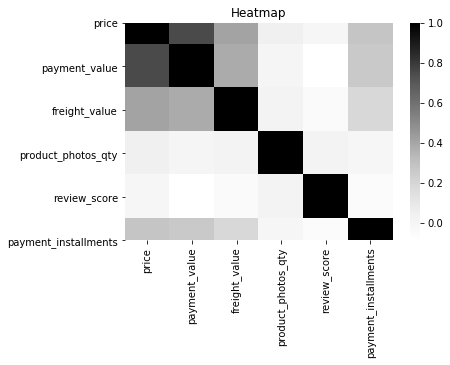

In [21]:
#plot the heatmap
sns.heatmap(df_norm.cov(), cmap='Greys')
plt.title('Heatmap')
plt.savefig('Pictures/Heatmap', facecolor = 'w')

## Products
this section will answer questions about the products

#### Questions to be answered
- What are the best product categories for people that are looking for things to sell on the market place?
- What are the best selling products? 
- How much do the best selling products generate in revenue?
- Do better ratings lead to higher sales?


#### Answers
- Some of the best categories are:
    - health and beauty
    - gifts and watches
    - bath, table, and bed - household products
    - sports
    - IT accessories
- Looking at the answers above shows, that the best categories for e-commerce are things that people use often but it is generally a specific size. One of the difficulties of e-commerce stores is still that it is hard to choose sizes for clothes for instance, therefore people are more likely to buy these things in a physical store and buy online things that they know what they are buying.
- The median revenue of a product is BRL 136.68 and the mean is 412.47 this shows not only that the average product does not generate a lot of revenue, but also confirms the hypothesis that there are many product that almost do not sell at all and some products that generate a lot of revenue
- the best selling product generates BRL 63'885, as we only have the product_id we cannot investigate what product it is
- there seems to be no correlation between the review score and the revenue of the product

In [22]:
revenue_product_category = master_df.groupby(['product_category_name']).price.sum()

### Top 10 Product Categories by Revenue

In [23]:
revenue_sorted=revenue_product_category.sort_values(ascending=False)
type(revenue_sorted)

pandas.core.series.Series

[]

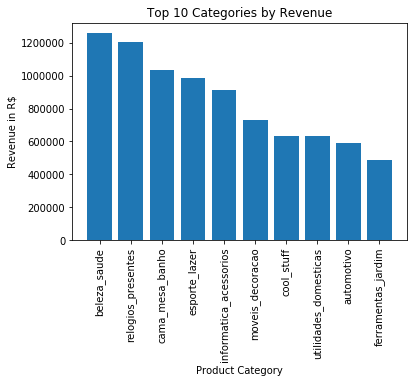

In [25]:
category_names=revenue_sorted.index[:10]
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Product Category')
plt.yticks()
plt.xticks(rotation=90)
plt.ylabel('Revenue in R$')
plt.bar(category_names, revenue_sorted[:10])
plt.savefig('Pictures/Top_10_Categories_by_Revenue', facecolor = 'w')
plt.plot()

### Top 10 Sold Products by Revenue

In [26]:
#calculate the revenue for each product
revenue_per_product = master_df.groupby(['product_id']).price.sum()

In [27]:
#number of unique product ids
master_df['product_id'].nunique()

32951

In [28]:
revenue_per_product = revenue_per_product.sort_values(ascending=False)

In [29]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


[]

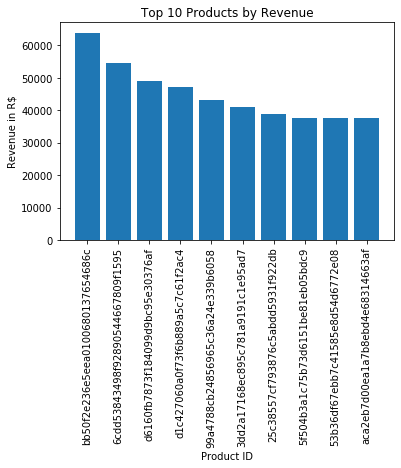

In [30]:
products=revenue_per_product.index[:10]
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.yticks()
plt.xticks(rotation=90)
plt.ylabel('Revenue in R$')
plt.bar(products, revenue_per_product[:10])
plt.savefig('Pictures/Top_10_Products_by_Revenue', facecolor = 'w')
plt.plot()

In [31]:
#calculate the mean and median revenue for each product
product_revenue = master_df.groupby(['product_id']).price.sum()

In [32]:
product_revenue_mean = product_revenue.mean()
product_revenue_median = product_revenue.median()

#generate printout
print("The mean of seller's revenue is: " 
      + str(product_revenue_mean)
      + " the median is: "
      + str(product_revenue_median))

The mean of seller's revenue is: 412.476365815993 the median is: 136.68


### Correlation Between Sales and Rating

In [33]:
#calculate the revenue and the average review for the products
rating_product = master_df.groupby(['product_id']).review_score.mean()
product_revenue = master_df.groupby(['product_id']).price.sum()
average_price = master_df.groupby(['product_id']).price.mean()
units_sold = master_df.groupby(['product_id']).price.count()

In [34]:
#merge the two pandas series into a dataframes
column_headers = ['review_score', 'product_revenue', 'average_price', 'units_sold']
review_vs_price = pd.merge(rating_product, product_revenue, left_index = True, right_index = True)
review_vs_price = pd.merge(review_vs_price, average_price, left_index = True, right_index = True)
review_vs_price = pd.merge(review_vs_price, units_sold, left_index = True, right_index = True)
review_vs_price.columns = column_headers

In [35]:
review_vs_price.describe()

,review_score,product_revenue,average_price,units_sold
count,32951.000000,32951.000000,32951.000000,32951.000000
mean,4.031617,412.476366,145.302692,3.418622
std,1.225592,1371.946464,246.895669,10.619716
min,1.000000,2.200000,0.850000,1.000000
25%,3.500000,59.900000,39.900000,1.000000
50%,4.500000,136.680000,79.000000,1.000000
75%,5.000000,329.000000,154.900000,3.000000
max,5.000000,63885.000000,6735.000000,527.000000


In [36]:
review_vs_price['review_score'].mean()

4.0316169629074325

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

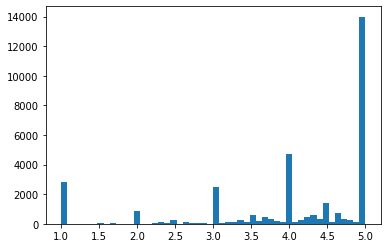

In [37]:
plt.hist(review_vs_price['review_score'], bins=50)
plt.plot

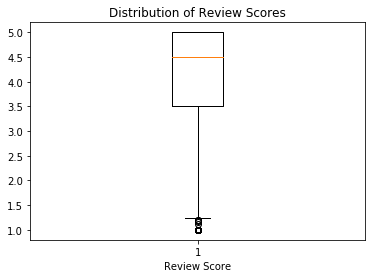

In [38]:
plt.boxplot(review_vs_price['review_score'])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.show()

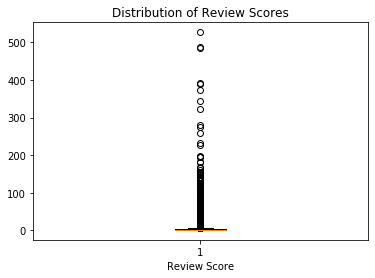

In [39]:
plt.boxplot(review_vs_price['units_sold'])
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.show()

the correlation coefficient between the review score and average price is: -0.0082778506162774 with a p-value of: 0.1329427017064835


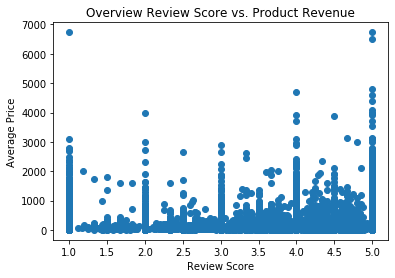

In [40]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(review_vs_price['review_score'], review_vs_price['average_price'])
print('the correlation coefficient between the review score and average price is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['review_score'],review_vs_price['average_price'])
plt.xlabel('Review Score')
plt.ylabel('Average Price')
plt.title('Overview Review Score vs. Product Revenue')
plt.show()

the correlation coefficient between the review score and product revenue is: -0.006400416071093434 with a p-value of: 0.24531768500613657


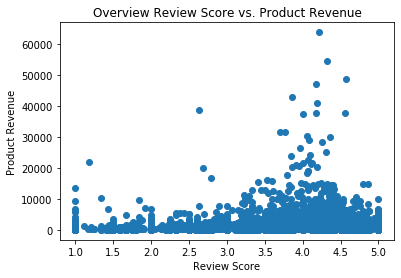

In [41]:
corr, p_value = pearsonr(review_vs_price['review_score'], review_vs_price['product_revenue'])
print('the correlation coefficient between the review score and product revenue is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))

plt.scatter(review_vs_price['review_score'],review_vs_price['product_revenue'])
plt.xlabel('Review Score')
plt.ylabel('Product Revenue')
plt.title('Overview Review Score vs. Product Revenue')
plt.show()

the correlation coefficient between the review score and units_sold is: -0.004163506968284898 with a p-value of: 0.44979821693836697


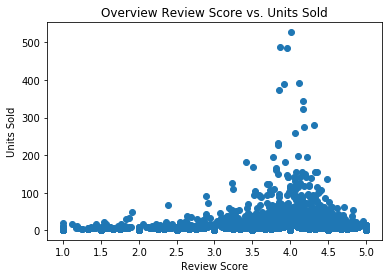

In [42]:
corr, p_value = pearsonr(review_vs_price['units_sold'], review_vs_price['review_score'])
print('the correlation coefficient between the review score and units_sold is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['review_score'],review_vs_price['units_sold'])
plt.xlabel('Review Score')
plt.ylabel('Units Sold')
plt.title('Overview Review Score vs. Units Sold')
plt.show()

the correlation coefficient between the average_price and units_sold is: -0.032136663582430426 with a p-value of: 5.383423340623596e-09


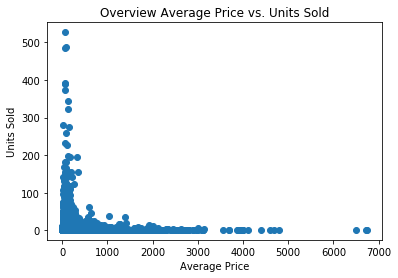

In [43]:
corr, p_value = pearsonr(review_vs_price['average_price'], review_vs_price['units_sold'])
print('the correlation coefficient between the average_price and units_sold is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))
plt.scatter(review_vs_price['average_price'],review_vs_price['units_sold'])
plt.xlabel('Average Price')
plt.ylabel('Units Sold')
plt.title('Overview Average Price vs. Units Sold')
plt.show()

### Number of Units Bought by Single Customer

#### Questions:
- Does the biggest part of the people buy frequently?

#### Answers:
- Similar to the sellers, the majority of buyers conduct very little purchases, there are some exceptions that buy a lot

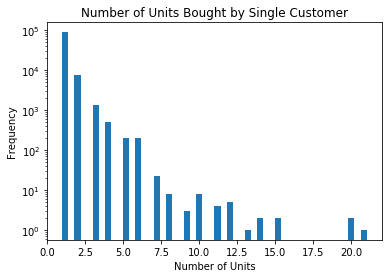

In [47]:
#count the number of units bought by a single customer
units_bought = master_df.groupby(['customer_id']).product_id.count()
units_bought.describe()
plt.yscale('log')
plt.title('Number of Units Bought by Single Customer')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.hist(units_bought, bins = 50)
plt.savefig('Pictures/Number_of_Units_Bought_by_Single_Customer', facecolor = 'w')

### Higher Ratings with Multiple Purchases

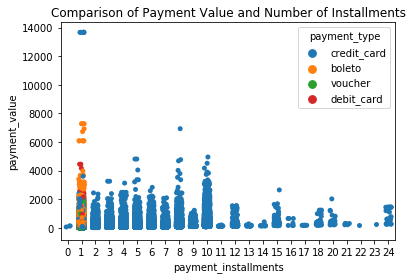

In [48]:
sns.stripplot(x='payment_installments', y='payment_value', data=master_df, jitter=0.2, hue='payment_type')
plt.title('Comparison of Payment Value and Number of Installments')
plt.savefig('Pictures/Comparison_of_Payment_Value_and_Number_of_Installments', facecolor = 'w')

the correlation coefficient between the units_bought and average_review is: -0.0802191377798648 with a p-value of: 8.095917830915884e-146


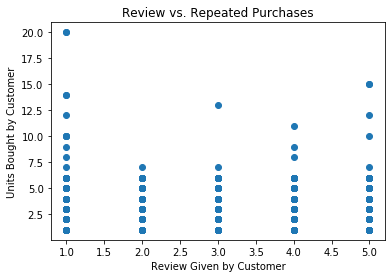

In [49]:
#calculate how many times a user bought a product
units_bought = master_df.groupby(['customer_id','product_id'])['product_id'].count()
#calculate how the average review a user gave to a product
average_review = master_df.groupby(['customer_id', 'product_id'])['review_score'].mean()


corr, p_value = pearsonr(units_bought, average_review)
print('the correlation coefficient between the units_bought and average_review is: '
      + str(corr)
      + ' with a p-value of: '
      + str(p_value))

plt.scatter(average_review, units_bought)
plt.xlabel('Review Given by Customer')
plt.ylabel('Units Bought by Customer')
plt.title('Review vs. Repeated Purchases')
plt.show()

### Monthly Sales Overviews 

## Payments

In [50]:
master_df.shape

(112647, 39)

[]

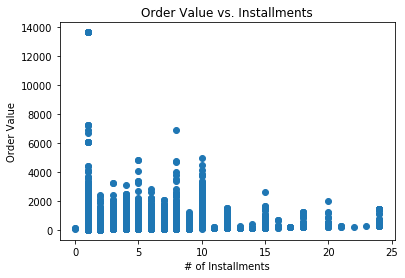

In [51]:
plt.title('Order Value vs. Installments')
plt.xlabel('# of Installments')
plt.ylabel('Order Value')
plt.scatter(master_df['payment_installments'], master_df['payment_value'])
plt.plot()

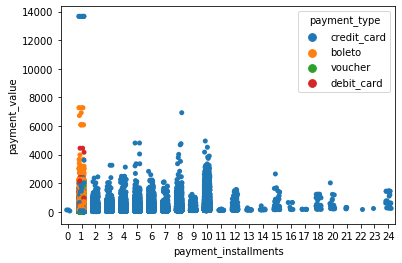

In [52]:
sns.stripplot(x='payment_installments', y='payment_value', data=master_df, jitter=0.2, hue='payment_type')

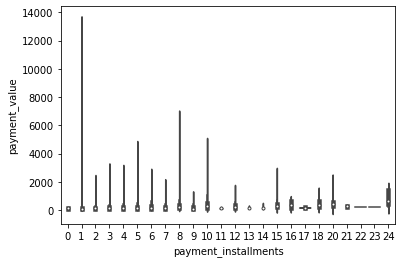

In [53]:
sns.violinplot(x='payment_installments', y='payment_value', data=master_df)

[]

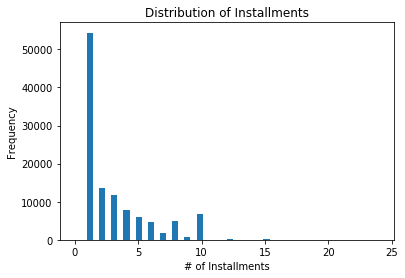

In [54]:
plt.hist(master_df['payment_installments'], bins=50)
plt.title('Distribution of Installments')
plt.xlabel('# of Installments')
plt.ylabel('Frequency')
plt.plot()

## Delivery

In [55]:
#calculation of average freight value and freight value as % of price
#calculate the order value and the total freight costs, because the costs were split between products of bigger orders
order_value = master_df.groupby('order_id').price.sum()
order_freight_value = master_df.groupby('order_id').freight_value.sum()

order_freight_value.describe()

count    98665.000000
mean        22.823707
std         21.650971
min          0.000000
25%         13.850000
50%         17.170000
75%         24.040000
max       1794.960000
Name: freight_value, dtype: float64

In [56]:
#merge the pandas series into a pandas dataframe
order_information = pd.merge(order_value, order_freight_value, left_index = True, right_index = True)

In [57]:
#calculate the freight value as % of the price
order_information['pct_FV_to_price'] = order_information['freight_value']/order_information['price']

In [58]:
order_information.describe()

,price,freight_value,pct_FV_to_price
count,98665.000000,98665.000000,98665.000000
mean,137.754105,22.823707,0.308391
std,210.646213,21.650971,0.314763
min,0.850000,0.000000,0.000000
25%,45.900000,13.850000,0.131864
50%,86.900000,17.170000,0.224374
75%,149.900000,24.040000,0.380196
max,13440.000000,1794.960000,21.447059


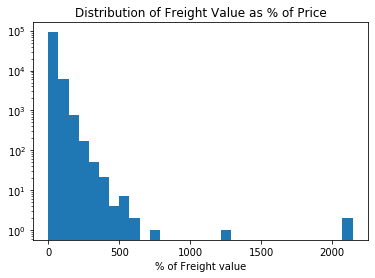

In [59]:
#the pct_FV_to_price needs to be multiplied by 100 to get %
plt.hist(order_information['pct_FV_to_price']*100, bins = 30)
plt.yscale('log')
plt.title('Distribution of Freight Value as % of Price')
plt.xlabel('% of Freight value')
plt.show()

## Seller

This section will answer questions about the seller of the marketplace

#### Questions:
- what is the revenue of the largest seller?
- are there many big sellers or a lot of small ones?
- is there a relationship between the order value and the revenue of the seller?

#### Answers:
- there are many sellers on the platform, but a few of them are able to create a significant revenue, this can be seen in the distribution of the seller's revenue, the mean revenue and the median revenue. The median revenue is with BRL 821.48 substantially lower than the mean BRL 4'391.48. This means that there are some outliers that highly influence the mean, but do not have an impact on the median.
- It seems like there is no relationship between the order value and the total revenue of the seller
- The largest seller created a revenue of BRL 229'472.63 in the examined period.

In [60]:
#calculate the revenue of the different sellers in the dataset
seller_revenue = order_items.groupby(['seller_id']).price.sum()
mean_purchase_seller = order_items.groupby(['seller_id']).price.mean()

In [61]:
#number of sellers on the marketplace
seller_revenue.count()

3095

In [62]:
#the seller with the largest revenue
seller_revenue.max()

229472.6299999981

[]

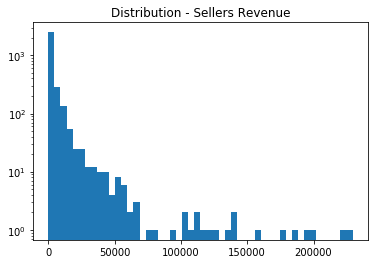

In [63]:
plt.hist(seller_revenue, bins=50)
plt.yscale('log') 
plt.title('Distribution - Sellers Revenue')
plt.savefig('Pictures/Distribution_Sellers_Revenue', facecolor = 'w')
plt.plot()

[]

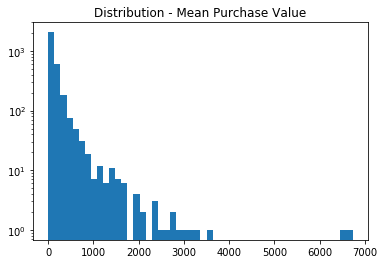

In [64]:
plt.hist(mean_purchase_seller, bins=50)
plt.yscale('log') 
plt.title('Distribution - Mean Purchase Value')
plt.plot()

In [65]:
seller_revenue_mean = seller_revenue.mean()
seller_revenue_median = seller_revenue.median()

#generate printout
print("The mean of seller's revenue is: " 
      + str(seller_revenue_mean)
      + " the median is: "
      + str(seller_revenue_median))

The mean of seller's revenue is: 4391.484232633301 the median is: 821.48


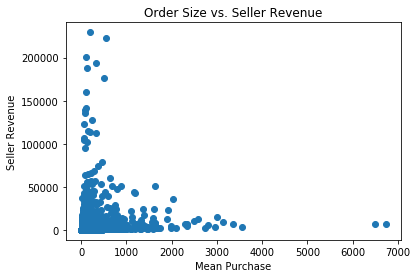

In [66]:
plt.scatter(mean_purchase_seller, seller_revenue)
plt.title('Order Size vs. Seller Revenue')
plt.ylabel('Seller Revenue')
plt.xlabel('Mean Purchase')
plt.show()

### Seller City and State

In [67]:
seller_revenue.head()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     2685.00
001cca7ae9ae17fb1caed9dfb1094831    25080.03
001e6ad469a905060d959994f1b41e4f      250.00
002100f778ceb8431b7a1020ff7ab48f     1234.50
003554e2dce176b5555353e4f3555ac8      120.00
Name: price, dtype: float64

In [68]:
from collections import defaultdict
#get only one entry per seller
# sorting seller ID first
master_df.sort_values('seller_state', inplace = True) 
  
# dropping ALL duplicte values 
sellers = master_df.drop_duplicates(subset ='seller_id') 

#count the states with a dictionary
states = defaultdict(int)

#loop over the sellers and store the different states
for state in sellers['seller_state']:
    states[state]+=1

#count the different cities with a dictionary
cities = defaultdict(int)
#loop over the sellers and store the different cities
for city in sellers['seller_city']:
    cities[city]+=1

[]

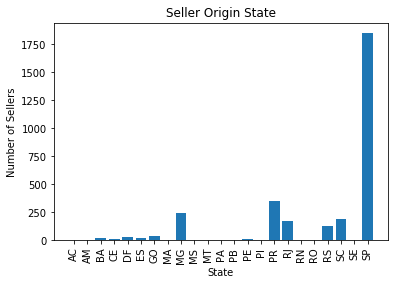

In [69]:
plt.title('Seller Origin State')
plt.xlabel('State')
plt.ylabel('Number of Sellers')
plt.yticks()
plt.xticks(rotation=90)
plt.bar(states.keys(), states.values())
plt.plot()

## Do Sellers Sell Locally?

#### Questions:
- In this section we would like to investigate if sellers generally sell more local or also across states

#### Answers:
- The Sankey Diagram confirms that São Paulo is the economic powerhouse of Brazil, most of the revenue is generated within this state(followed by Rio de Janeiro and Minas Gerais). The origin of the products are also mainly these states, but there is a significant part of revenue also comming from other states.

In [70]:
states = master_df[['seller_state','customer_state']]
states.head()

,seller_state,customer_state
118190,AC,SP
117202,AM,MA
117203,AM,MG
117204,AM,AL
59611,BA,RJ


In [71]:
states = master_df[['seller_state','customer_state']]
states_new = states.groupby(['seller_state', 'customer_state']).size().reset_index()
states_new.columns = ['seller_state','customer_state', 'number_of_sales']
states_new.shape

(417, 3)

In [72]:
#sort the values in descending order to get the states with the biggest sales
states_new = states_new.sort_values(by=['number_of_sales'], ascending = False)
#cut off the top 25 combination of states to display in the Sankey Diagram
states_new = states_new.iloc[:25,:]
states_new.shape

(25, 3)

In [73]:
#create a list with unique values for each state to use it as index labels
customer_states = states_new['customer_state'].unique()
seller_states = states_new['seller_state'].unique()
states = np.unique(np.concatenate((customer_states, seller_states),0))
states_list = states.tolist()

In [74]:
#create a list from each dataframe column
seller_states = states_new['seller_state'].to_list()
customer_states = states_new['customer_state'].to_list()
number_of_sales = states_new['number_of_sales'].to_list()

In [75]:
#replace the state with the respective number of the index of the list states_list
for num, states in enumerate(customer_states):
    customer_states[num] = states_list.index(states)

for num, states in enumerate(seller_states):
    seller_states[num] = states_list.index(states)

In [77]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = states_list,
      color = "blue"
    ),
    link = dict(
      source = seller_states, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = customer_states,
      value = number_of_sales
  ))])

fig.update_layout(title_text="Sankey Diagram Sales Flow", font_size=10)
fig.show()

## Clients

In [66]:
client_spending = master_df.groupby(['customer_id']).price.sum()
clients=client_spending.sort_values(ascending=False)

#print revenue of top 20 clients
clients[:20]

customer_id
1617b1357756262bfa56ab541c47bc16    13440.00
ec5b2ba62e574342386871631fafd3fc     7160.00
c6e2731c5b391845f6800c97401a43a9     6735.00
f48d464a0baaea338cb25f816991ab1f     6729.00
3fd6777bbce08a352fddd04e4a7cc8f6     6499.00
05455dfa7cd02f13d132aa7a6a9729c6     5934.60
df55c14d1476a9a3467f131269c2477f     4799.00
24bbf5fd2f2e1b359ee7de94defc4a15     4690.00
e0a2412720e9ea4f26c1ac985f6a7358     4599.90
3d979689f636322c62418b6346b1c6d2     4590.00
cc803a2c412833101651d3f90ca7de24     4400.00
1afc82cd60e303ef09b4ef9837c9505c     4399.87
35a413c7ca3c69756cb75867d6311c0d     4099.99
e9b0d0eb3015ef1c9ce6cf5b9dcbee9f     4059.00
c6695e3b1e48680db36b487419fb0398     3999.90
926b6a6fb8b6081e00b335edaf578d35     3999.00
3be2c536886b2ea4668eced3a80dd0bb     3980.00
31e83c01fce824d0ff786fcd48dad009     3930.00
eb7a157e8da9c488cd4ddc48711f1097     3899.00
19b32919fa1198aefc0773ee2e46e693     3700.00
Name: price, dtype: float64

[]

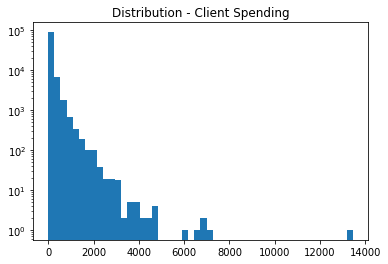

In [67]:
plt.hist(client_spending, bins=50)
plt.yscale('log') 
plt.title('Distribution - Client Spending')
plt.plot()

# Recomendation System 

### Collaborative Filtering

In [14]:
import pandas as pd
import numpy as np
import time

In [17]:
from functools import reduce
def collab_filter(customer_id, product_id):
    """using collaborative filering to estimate how likely the user is to like a product"""
    #get the state of the customer
    #customer_state = master_df['customer_state'].loc[master_df['customer_id'] == customer_id].iloc[0]
    
    #product_id filter
    product_id_log = master_df['product_id'] == product_id
    
    #get the product category of the product_id
    product_category = master_df['product_category_name'].loc[product_id_log].iloc[0]
    
    ratings_by_others = master_df.loc[reduce(np.logical_and,
                                             [master_df['customer_id'] != customer_id,
                                              master_df['product_id'] == product_id
                                             ])]
    
    #define the customer logic
    customer_id_log = master_df['customer_id'] == customer_id
    product_category_log = master_df['product_category_name'] == product_category
    
    mean_product_category =  master_df['review_score'].loc[customer_id_log & 
                                                           product_category_log].mean()
    
    #mean_others = master_df['review_score'].loc
    mean_others = ratings_by_others.pivot_table(values = 'review_score', index = 'customer_id', columns = 'product_id', aggfunc='mean').mean()
    
    if np.isnan(mean_product_category):
        mean = mean_others
    else:
        mean = 0.5 * mean_others + 0.5 * mean_product_category
    #print(mean_others)
    #print(mean_product_category)
    return mean_others

In [19]:
#filter all of the rows that have more than 1 review 
products_reviews_grouped = master_df[['product_id', 'customer_id', 'review_score']].groupby(['product_id']).review_score.count().reset_index()
products_with_reviews = products_reviews_grouped.loc[products_reviews_grouped['review_score'] > 1]['product_id']

#create dataframe with product_id, customer_id, and review_score with the products that have 1+ review
reviews_relevant = master_df[['customer_id', 'product_id', 'review_score']].loc[master_df['product_id'].isin(products_with_reviews)]
reviews_relevant.drop_duplicates(subset = ['product_id', 'customer_id']  , keep = False, inplace = True)
reviews_relevant.head(20)

,customer_id,product_id,review_score
0,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,5
1,e6eecc5a77de221464d1c4eaff0a9b64,4244733e06e7ecb4970a6e2683c13e61,5
2,4ef55bf80f711b372afebcb7c715344a,4244733e06e7ecb4970a6e2683c13e61,4
3,30407a72ad8b3f4df4d15369126b20c9,4244733e06e7ecb4970a6e2683c13e61,5
4,91a792fef70ecd8cc69d3c7feb3d12da,4244733e06e7ecb4970a6e2683c13e61,5
5,4851b3bca4a48b395dfad7aa57c3f72a,4244733e06e7ecb4970a6e2683c13e61,5
6,c32c207d9ebf75958011557ac1624e2f,4244733e06e7ecb4970a6e2683c13e61,5
7,0a29abf475fb8039d2775913d6f0b6f0,4244733e06e7ecb4970a6e2683c13e61,5
10,2e76c1f2a920153d79cc98b634c50942,4244733e06e7ecb4970a6e2683c13e61,1
11,dc573d2a61a467e5e2826c1729691859,436c8d57ff8d4aa254318e9bd9b48c83,5


In [86]:
#select reviews to estimate the accuracy
dict_review_cust = pd.Series(reviews_relevant['product_id'].iloc[:2000].values,index=reviews_relevant['customer_id'].iloc[:2000]).to_dict()

In [21]:
error = []

for key, val in dict_review_cust.items():
    estimate = (collab_filter(key, val))
    #logic product_id & customer_id
    logic_customer = master_df['customer_id'] == key
    logic_product = master_df['product_id'] == val
    
    actual = master_df['review_score'].loc[logic_customer & logic_product].values
    
    #calculate the absolute error and append it to the list
    error.append(abs(actual-estimate))

print('the mean error is:',np.mean(error))

the mean error is: 1.1220632842355507


### Use Linear Regression to Forecast Review Score

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [148]:
master_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP,...,campos dos goytacazes,RJ,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,27277,volta redonda,SP,...,jatai,GO,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,27277,volta redonda,SP,...,belo horizonte,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,27277,volta redonda,SP,...,sao jose dos pinhais,PR,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,27277,volta redonda,SP,...,conselheiro lafaiete,MG,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [174]:
regression_df = master_df[['review_score',
                           'customer_state',
                           'product_category_name',
                           'product_photos_qty',
                           'product_id']]

#drop the columns with empyt entries
regression_df = regression_df.dropna()

#filter all of the rows that have more than 1 review 
regression_df = regression_df[['review_score',
                               'customer_state',
                               'product_category_name',
                               'product_photos_qty',
                               'product_id']].groupby(['product_id']).review_score.count().reset_index()
regression_df = regression_df.loc[regression_df['review_score'] > 3]['product_id']

#create dataframe with product_id, customer_id, and review_score with the products that have 1+ review
regression_relevant = master_df[['review_score',
                                 'customer_state',
                                 'product_category_name',
                                 'product_photos_qty',
                                 'product_id']].loc[master_df['product_id'].isin(regression_df)]

regression_relevant.head()

,review_score,customer_state,product_category_name,product_photos_qty,product_id
0,5,RJ,cool_stuff,4.0,4244733e06e7ecb4970a6e2683c13e61
1,5,GO,cool_stuff,4.0,4244733e06e7ecb4970a6e2683c13e61
2,4,MG,cool_stuff,4.0,4244733e06e7ecb4970a6e2683c13e61
3,5,PR,cool_stuff,4.0,4244733e06e7ecb4970a6e2683c13e61
4,5,MG,cool_stuff,4.0,4244733e06e7ecb4970a6e2683c13e61


In [175]:
#assign the respective columb to x and y
y = regression_relevant['review_score']
X = regression_relevant[['customer_state',
                         'product_category_name',
                         'product_photos_qty',
                         'product_id']]
               #'product_id']]

In [176]:
X = pd.get_dummies(X)
X.head()

,product_photos_qty,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,...,product_id_ffaf0af7eebb57c7f262b51ebb05dfd6,product_id_ffb97eb64c6fe1baada2410288c04457,product_id_ffbe3df3856b1fef3fee8f1264105a89,product_id_ffc0b406806006602c5853b00ab5f7fd,product_id_ffc9caf33e2d1e9f44e3e06da19085f7,product_id_ffd4bf4306745865e5692f69bd237893,product_id_ffedbd68fa6f44e788ff6c2db8094715,product_id_ffef256879dbadcab7e77950f4f4a195,product_id_fff0a542c3c62682f23305214eaeaa24,product_id_fffdb2d0ec8d6a61f0a0a0db3f25b441
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
from scipy.sparse import csr_matrix

In [178]:
X = csr_matrix(X).toarray()

In [179]:
X.shape

(74057, 6380)

In [180]:
y.shape

(74057,)

In [181]:
#get dummies for the dataframe before train test split
#triplet form vs. Compressed Sparse Row matrix

In [182]:
#function to create dummies - you do not want to have a train with no 0

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [190]:
X_train

array([[6., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

In [191]:
#fit the regression model
reg = LinearRegression().fit(X_train, y_train)

In [193]:
#estimate the R2 and coefficients
print('R2:', reg.score(X_train, y_train))
#print('coefficients:', reg.coef_)

R2: 0.2703028926514838


In [ ]:
reg.predict(np.array([[3, 5]]))

## Customer Lifetime Value